<a href="https://colab.research.google.com/github/Lucasdbvd/Regress-o-marketing/blob/main/Desafio_4_Construindo_um_modelo_de_Regress%C3%A3o_para_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de análise de dados com modelo de regressão
Para que eu possa detalhar as etapas deste projeto resolvi organizar por etapas do CRISP-DM:

##Business Understand

Foi recebido um documento de uma empresa que  está investindo mensalmente em plataformas de publicidade online para a prospecção de leads, registrando todos os gastos com publicidade e todos os retornos
de vendas gerados a partir desses investimentos.

Neste documento eles estão requisitando uma analise dos seus dados para entender melhor a relação entre as variáveis presentes e
identificar os fatores que mais impactam na geração de leads.

Além disso, a empresa busca criar um
modelo de predição de valores para estimar o retorno de vendas que pode ser gerado
a partir de um determinado investimento em publicidade.

##Data Understand

Para entendimento melhor dos dados primeiro precisamos importá-lo e observar seu comportamento, segue abaixo os códigos utilizados para este objetivo:

In [ ]:
# Importação da biblioteca de manipulação de dados

import pandas as pd

# Captação e leitura dos dados

from google.colab import files
upload = files.upload()
data = pd.read_csv('/content/MKT (1).csv')


Saving MKT (1).csv to MKT (1).csv


In [ ]:
# Observação dos dados

data

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [ ]:
# Observação de algumas características das colunas

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Observação do comportamento dos dados por coluna

data.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


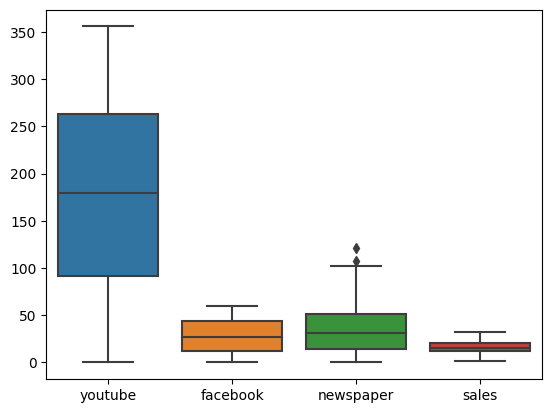

In [ ]:
# Analisando distribuição em um diagrama de caixas (boxplot)

import seaborn as sns
sns.boxplot(data);

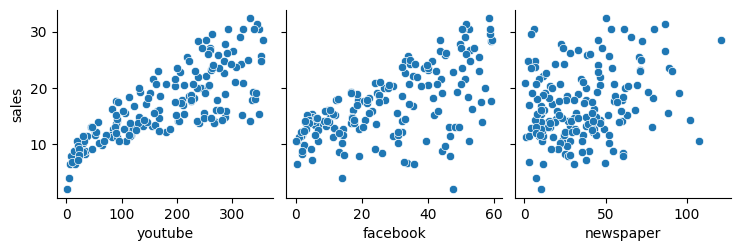

In [ ]:
# Analisado as relações entre dados com foco nas vendas utilizando grafico de dispersão (pairplot)

sns.pairplot(data,x_vars=["youtube","facebook","newspaper"],y_vars="sales");

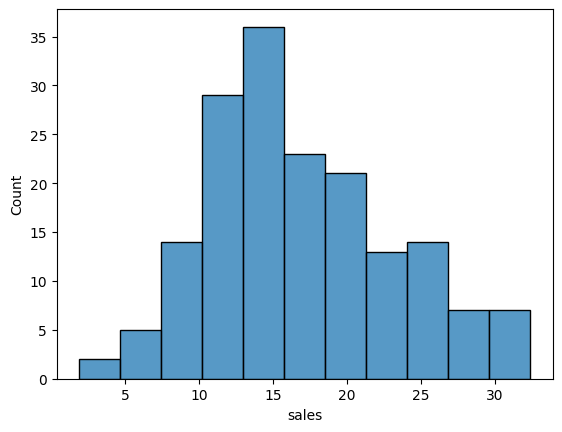

In [ ]:
# Analisando melhor a distribuição de valores de venda com um grafico histograma (histplot)

sns.histplot(data["sales"]);

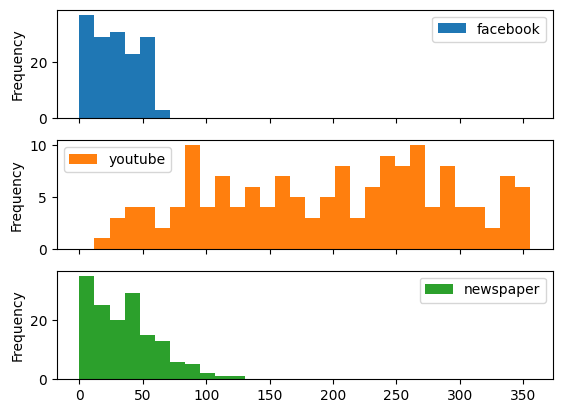

In [ ]:
# Analisando a distribuição dos investimentos de cada plataforma após observar que
# os melhores valores de venda estão acima de 10 reais.

data.loc[(data.sales > 10),
 ['sales','facebook','youtube','newspaper']].plot.hist(x='sales',subplots= True,bins=30);

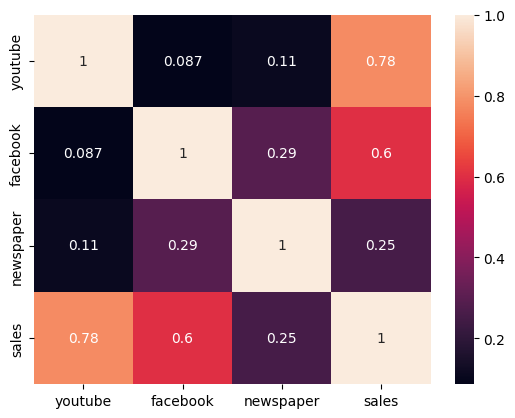

In [ ]:
# Analisando mais uma vez a correlação entre colunas utilizando um mapa de calor com métricas percentuais

sns.heatmap(data[['youtube','facebook','newspaper','sales']].corr(),annot=True);

Após todo estudo dos dados nesta fase pudemos observar um grande valor de investimento na plataforma do youtube, um valor mediano de investimento para a plataforma do facebook e pouco investimento em newspaper. Há uma clara relação de grande retorno do investimento em cima do investimento feito no youtube, tendo altos retornos nas vendas com altos investimentos em youtube. A plataforma do facebook tambem tem uma certa relação, mas o impacto é menor, tendo possibilidade de maior desperdício de valor investido por venda caso seja feito um alto investimento na plataforma. Ja a opção de investimento newspaper não influencia bem nas vendas, tendo muito pouca chance de venda de alto valor, gerando desperdício de recursos por esta plataforma.

Outra observação feita é com relação a dispersão dos valores de investimento entre plataforma pelo valor das vendas. Foi observado que as melhores margens de lucro relativo a investimento feito e o seu retorno foi nas vendas menores, com menos valor investido, porem com melhor distribuição de investimento entre plataformas. Ou seja, quanto maior o investimento feito, maior a possibilidade de desperdício, tendo menos lucro, o que pode se traduzir como um risco para a empresa decidir se vale a pena executá-lo.

## Data Preparation

Nesta fase devemos preparar os dados para introduzir no modelo de forma que não ocorrerá problemas futuros por conta de dados faltantes, com tipos errados, ou que fogem da normalidade que seu propósito propõem. Neste caso específico, os dados estão em perfeito estado, não tendo necessidade de efetuar alterações, desta forma, prosseguimos para a fase da modelagem do dado.

## Modeling

Nesta fase começamos a dar um passo em direção ao aprendizado de máquina (machine learnig). É nesta fase que exploramos o melhor modelo e seus parâmetros para trazer maior assertividade para o objetivo do projeto da empresa. Como a empresa requisitou especificamente um modelo de regressão, foi estudado os tipos de modelo de regresão que elhor se encaixariam netes dados. Abaixo você poderá observar o código que foi usado para este momento, e descobrirá como foi feito esta análise da modelagem e a escolha do melhor modelo de regressão:

In [ ]:
# Importação da biblioteca que treinará o modelo para poder prever valores futuros

from sklearn.model_selection import train_test_split

In [ ]:
# Definindo as variáveis de treino (x e y) do train_test_split

x = data[["youtube","facebook","newspaper"]]
y = data[['sales']]

x_train, x_test, y_train, y_test = train_test_split(
    x,y, train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
# Importando bibliotecas de cada tipo de modelo utilizado para teste, para escoher
# a melhor modelagem de regressão, podendo ser Linear Regression, Support Vector Regression,
# ou Decision Tree Regression (xgboost).

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
# Construindo e treinando cada um dos modelos de regressão

model_linear = LinearRegression().fit(x_train,y_train)
model_svr = SVR().fit(x_train,y_train)
model_decision3 = XGBRegressor().fit(x_train,y_train)

# Preparando os modelos de regressão para predizer os valores futuros

y_pred_linear = model_linear.predict(x_test)
y_pred_svr = model_svr.predict(x_test)
y_pred_decision3 = model_decision3.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Importando as bibliotecas que irão servir como métricas de avaliação de cada modelo (r2, MSE e RMSE)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [ ]:
# Métricas de precisão do modelo de regressão linear

r2_linear = r2_score(y_test, y_pred_linear)
MSE_linear = mean_squared_error(y_test,y_pred_linear)
RMSE_linear = np.sqrt(MSE_linear)
print(f'Métricas regressão linear:\nRMSE={RMSE_linear}, \nMSE={MSE_linear}, \nr2={r2_linear}\n')

# Métricas de precisão do modelo de suporte à regressão vetorial

r2_svr = r2_score(y_test, y_pred_svr)
MSE_svr = mean_squared_error(y_test,y_pred_svr)
RMSE_svr = np.sqrt(MSE_svr)
print(f'Métricas regressão svr:\nRMSE={RMSE_svr}, \nMSE={MSE_svr}, \nr2={r2_svr}\n')

# Métricas de precisão do modelo de regressão da árvore de decisão

r2_decision3 = r2_score(y_test, y_pred_decision3)
MSE_decision3 = mean_squared_error(y_test,y_pred_decision3)
RMSE_decision3 = np.sqrt(MSE_decision3)
print(f'Métricas regressão svr:\nRMSE={RMSE_decision3}, \nMSE={MSE_decision3}, \nr2={r2_decision3}\n')

# OBS.: melhor modelo com menor variação de erro no MSE e maior precisão no r2_score é o de regressão de arvore
# de decisão utilizado pela biblioteca xgboost.

Métricas regressão linear:
RMSE=2.167820468840155, 
MSE=4.699445585122349, 
r2=0.882423505618885

Métricas regressão svr:
RMSE=3.0503256712463402, 
MSE=9.304486700664437, 
r2=0.7672089380621374

Métricas regressão svr:
RMSE=1.2777754479146548, 
MSE=1.6327100952934968, 
r2=0.9591508560173556



In [ ]:
# Teste manual dos modelos de regressão, insira valores de investimento para cada plataforma
# e veja qual a previsão de venda em cada modelo.

def models_regressor (youtube,facebook,newspaper):
  entrada = [[youtube,facebook,newspaper]]
  print(f"Previsão de venda do modelo de regressão linear: {model_linear.predict(entrada)[0]}")
  print(f"Previsão de venda do modelo de suporte à regressão vetorial: {model_svr.predict(entrada)[0]}")
  print(f"Previsão de venda do modelo de regressão da árvore de decisão: {model_decision3.predict(entrada)[0]}\n")
youtube = float(input("Digite um valor de investimento no youtube: \n"))
facebook = float(input("Digite um valor de investimento no facebook: \n"))
newspaper = float(input("Digite um valor de investimento no newspaper: \n"))
models_regressor(youtube,facebook,newspaper)

Digite um valor de investimento no youtube: 
50
Digite um valor de investimento no facebook: 
30
Digite um valor de investimento no newspaper: 
5
Previsão de venda do modelo de regressão linear: [11.56812093]
Previsão de venda do modelo de suporte à regressão vetorial: 11.033519969077407
Previsão de venda do modelo de regressão da árvore de decisão: 11.554855346679688



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Após estudo e analise dos modelos propostos para resolução do poblema da empresa em questão, observou-se que o melhor modelo com menor variação de erro na métrica MSE e maior precisão na métrica r2_score é o de regressão de arvore de decisão utilizado pela biblioteca xgboost. Foi preparado tambem um teste manual das previsões de venda de acordo com o valor de investimento que o usuário digitasse.

## Conclusão

Como o requisitado pela empresa foi a construção do modelo de regressão para predição das vendas de acordo com um investimento futuro desejável, o final do projeto se conclui na etapa de modeling. As etapas Evaluation e Deployment não são aplicadas nesta documentação, mas são etapas muito importantes para revisão ou aprimoramentos e inserção devida do modelo no ambiente de produção da empresa de acordo com as ferramentas e sistemas utilizados pela empresa.

#FIM